## Pandas and Matplotlib (and a bit of Seaborn)

Data source: www.kaggle.com/mczielinski/bitcoin-historical-data

Columns:
- Timestamp (UTC)
- Open: Bitcoin price in Currency units at time period open
- High: Highest Bitcoin price in Currency units during time period
- Low: Lowest Bitcoin price in Currency units during time period
- Close: Bitcoin price in Currency units at time period close
- Volume (BTC): Volume of BTC transacted in time period
- Volume (Currency): Volume of Currency transacted in time period
- Volume: weighted average price (VWAP)

Notes:
* Volume(Currency) = Volume(BTC) x Weighted_Price, represents the price at which trade was made.
* See: https://www.kaggle.com/mczielinski/bitcoin-historical-data/discussion/36863#latest-218050

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading data from CSV

```
pd.read_csv()
```

In [41]:
df = pd.read_csv('../../data/bitcoin/bitflyerJPY_1-min_data_2018-06-01_to_2018-06-27.csv')

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2018-06-01 00:00:00,816163,816460,815700,816460,9.137702,7.456346e+06,815997.92105
1,2018-06-01 00:01:00,816460,816999,816438,816563,4.359824,3.560639e+06,816693.32850
2,2018-06-01 00:02:00,816910,817079,816741,817074,1.701717,1.390245e+06,816965.75657
3,2018-06-01 00:03:00,817066,817541,816883,817462,3.546464,2.898951e+06,817419.97322
4,2018-06-01 00:04:00,817903,818000,817348,818000,9.823000,8.033058e+06,817780.58868


In [42]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2018-06-01 00:00:00,816163,816460,815700,816460,9.137702,7.456346e+06,815997.92105
1,2018-06-01 00:01:00,816460,816999,816438,816563,4.359824,3.560639e+06,816693.32850
2,2018-06-01 00:02:00,816910,817079,816741,817074,1.701717,1.390245e+06,816965.75657
3,2018-06-01 00:03:00,817066,817541,816883,817462,3.546464,2.898951e+06,817419.97322
4,2018-06-01 00:04:00,817903,818000,817348,818000,9.823000,8.033058e+06,817780.58868
5,2018-06-01 00:05:00,818000,818462,817836,818434,4.893215,4.003442e+06,818161.85934
6,2018-06-01 00:06:00,818544,818544,818434,818500,1.332351,1.090443e+06,818435.60924
7,2018-06-01 00:07:00,818437,818900,818372,818432,7.093076,5.805792e+06,818515.51170
8,2018-06-01 00:08:00,818232,820790,817438,819665,23.945281,1.963105e+07,819829.65286
9,2018-06-01 00:09:00,819669,819669,817863,819296,6.429505,5.264810e+06,818851.52641


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37441 entries, 0 to 37440
Data columns (total 8 columns):
Timestamp            37441 non-null object
Open                 37441 non-null int64
High                 37441 non-null int64
Low                  37441 non-null int64
Close                37441 non-null int64
Volume_(BTC)         37441 non-null float64
Volume_(Currency)    37441 non-null float64
Weighted_Price       37441 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.3+ MB


### Handling timestamps

```
pd.to_datetime()
```

In [44]:
# timestamp is an object, let's convert it to a real time stamp

df.Timestamp = pd.to_datetime(df.Timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37441 entries, 0 to 37440
Data columns (total 8 columns):
Timestamp            37441 non-null datetime64[ns]
Open                 37441 non-null int64
High                 37441 non-null int64
Low                  37441 non-null int64
Close                37441 non-null int64
Volume_(BTC)         37441 non-null float64
Volume_(Currency)    37441 non-null float64
Weighted_Price       37441 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.3 MB


In [46]:
# let's find out the range of timestamps and pick a subset

df.Timestamp.describe()

count                   37441
unique                  37441
top       2018-06-26 15:40:00
freq                        1
first     2018-06-01 00:00:00
last      2018-06-27 00:00:00
Name: Timestamp, dtype: object

### Selecting data

- df.loc[row_selector]
- df.loc[row_selector, column_selector]

In [72]:
# pick June 13 using loc

df1 = df.loc[(df.Timestamp > '2018-06-12 23:59') & (df.Timestamp < '2018-06-14 00:00')]
df1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
17280,2018-06-13 00:00:00,729990,729990,729183,729183,3.827011,2.792179e+06,729597.74254
17281,2018-06-13 00:01:00,729121,729200,728576,729088,9.632921,7.021360e+06,728892.03768
17282,2018-06-13 00:02:00,729249,729500,729078,729463,13.908899,1.014184e+07,729161.64858
17283,2018-06-13 00:03:00,729355,730500,729355,729369,19.036052,1.389209e+07,729777.80865
17284,2018-06-13 00:04:00,729426,729675,729200,729232,5.133613,3.744046e+06,729319.95599


In [73]:
# pick June 13 and any two columns using loc

df1 = df.loc[(df.Timestamp > '2018-06-12 23:59') & (df.Timestamp < '2018-06-14 00:00'), ['Open', 'Close']]
df1.head()

,Open,Close
17280,729990,729183
17281,729121,729088
17282,729249,729463
17283,729355,729369
17284,729426,729232


### Combining dataframes

```
pd.concat()
```

In [76]:
# Combining columns into 1 dataframe

df1 = df['Open']
df2 = df['Volume_(BTC)']

df3 = pd.concat([df1, df2], axis=1) # column-wise
df3.head()

,Open,Volume_(BTC)
0,816163,9.137702
1,816460,4.359824
2,816910,1.701717
3,817066,3.546464
4,817903,9.823000


In [78]:
# Combining rows into 1 dataframe

df1 = df.loc[(df.Timestamp > '2018-06-12 23:59') & (df.Timestamp < '2018-06-13 00:10'), ['Open']]
df2 = df.loc[(df.Timestamp > '2018-06-13 00:10') & (df.Timestamp < '2018-06-13 00:20'), ['Open']]

print(df1)
print(df2)

df3 = pd.concat([df1, df2]) # axis=0 default, row-wise
print(df3)

         Open
17280  729990
17281  729121
17282  729249
17283  729355
17284  729426
17285  729541
17286  729233
17287  728904
17288  728729
17289  729721
         Open
17291  730688
17292  729915
17293  730000
17294  729812
17295  729881
17296  729700
17297  730000
17298  729879
17299  730870
         Open
17280  729990
17281  729121
17282  729249
17283  729355
17284  729426
17285  729541
17286  729233
17287  728904
17288  728729
17289  729721
17291  730688
17292  729915
17293  730000
17294  729812
17295  729881
17296  729700
17297  730000
17298  729879
17299  730870


### Deleting from dataframe

```
df.drop()
```

In [84]:
# Deleting columns (by column name)

df1 = df.drop(['Low', 'Volume_(Currency)'], axis=1) # columns
df1.head()

,Timestamp,Open,High,Close,Volume_(BTC),Weighted_Price
0,2018-06-01 00:00:00,816163,816460,816460,9.137702,815997.92105
1,2018-06-01 00:01:00,816460,816999,816563,4.359824,816693.32850
2,2018-06-01 00:02:00,816910,817079,817074,1.701717,816965.75657
3,2018-06-01 00:03:00,817066,817541,817462,3.546464,817419.97322
4,2018-06-01 00:04:00,817903,818000,818000,9.823000,817780.58868


In [87]:
# Deleting rows (by index)

index = df.loc[df.Timestamp < '2018-06-02 00:00'].index
df1 = df.drop(index)
df1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1440,2018-06-02 00:00:00,823777,824530,823666,824530,9.205040,7.584621e+06,823963.95196
1441,2018-06-02 00:01:00,824530,824605,824162,824208,2.290530,1.888584e+06,824518.21233
1442,2018-06-02 00:02:00,824204,824204,822430,823395,12.055356,9.923327e+06,823146.72541
1443,2018-06-02 00:03:00,823371,823732,823310,823420,3.552704,2.925112e+06,823348.10680
1444,2018-06-02 00:04:00,823420,824212,823320,824212,6.237605,5.138061e+06,823723.39545


### Saving dataframe

```
df.to_csv()
```

In [96]:
df1 = df.loc[df.Timestamp < '2018-06-02 00:00']
df1.to_csv('bitcoin_June1_2018.csv', index=False) # usually skip numeric index

df1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2018-06-01 00:00:00,816163,816460,815700,816460,9.137702,7.456346e+06,815997.92105
1,2018-06-01 00:01:00,816460,816999,816438,816563,4.359824,3.560639e+06,816693.32850
2,2018-06-01 00:02:00,816910,817079,816741,817074,1.701717,1.390245e+06,816965.75657
3,2018-06-01 00:03:00,817066,817541,816883,817462,3.546464,2.898951e+06,817419.97322
4,2018-06-01 00:04:00,817903,818000,817348,818000,9.823000,8.033058e+06,817780.58868


In [97]:
df2 = pd.read_csv('bitcoin_June1_2018.csv')
df2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2018-06-01 00:00:00,816163,816460,815700,816460,9.137702,7.456346e+06,815997.92105
1,2018-06-01 00:01:00,816460,816999,816438,816563,4.359824,3.560639e+06,816693.32850
2,2018-06-01 00:02:00,816910,817079,816741,817074,1.701717,1.390245e+06,816965.75657
3,2018-06-01 00:03:00,817066,817541,816883,817462,3.546464,2.898951e+06,817419.97322
4,2018-06-01 00:04:00,817903,818000,817348,818000,9.823000,8.033058e+06,817780.58868


### To Numpy

Get Numpy array from Dataframe

```
df[column].values
```

In [139]:
df['Close'].values

array([816460, 816563, 817074, ..., 673982, 673064, 672008], dtype=int64)

### From Numpy

Create Dataframe from Numpy array

```
df = pd.DataFrame(numpy_array)
```

In [140]:
array1 = df['Close'].values

df1 = pd.DataFrame(array1)
df1.head()

,0
0,816460
1,816563
2,817074
3,817462
4,818000


### Inspecting dataframe

Use when you get error with pandas, sklearn, etc:

- `df.columns` - show columns in dataframe

- `df.shape` - show shape of dataframe

- `df.info()` - shows the types and number of valid (non-NaN) values

In [134]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [135]:
df.shape

(37441, 8)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37441 entries, 0 to 37440
Data columns (total 8 columns):
Timestamp            37441 non-null datetime64[ns]
Open                 37441 non-null int64
High                 37441 non-null int64
Low                  37441 non-null int64
Close                37441 non-null int64
Volume_(BTC)         37441 non-null float64
Volume_(Currency)    37441 non-null float64
Weighted_Price       37441 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.3 MB


### Plotting

```
fig, ax = plt.subplots()
ax.plot(X, y1, label='a')
ax.plot(X, y2, label='b')
ax.legend()
```

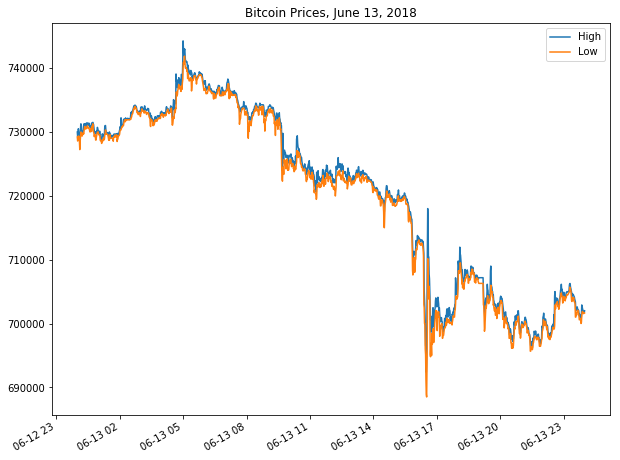

In [114]:
df1 = df.loc[(df.Timestamp > '2018-06-12 23:59') & (df.Timestamp < '2018-06-14 00:00')]

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df1['Timestamp'], df1['High'], label='High')
ax.plot(df1['Timestamp'], df1['Low'], label='Low')
ax.legend()

ax.set_title('Bitcoin Prices, June 13, 2018')

fig.autofmt_xdate() # magic command to rotate dates axis nicely

# https://matplotlib.org/1.3.1/users/recipes.html#fixing-common-date-annoyances

In [60]:
# Repeat exercise for other columns

### Side-by-side graphs

```
fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()

axes[0].plot(X, y1)
axes[1].plot(X, y2)
```

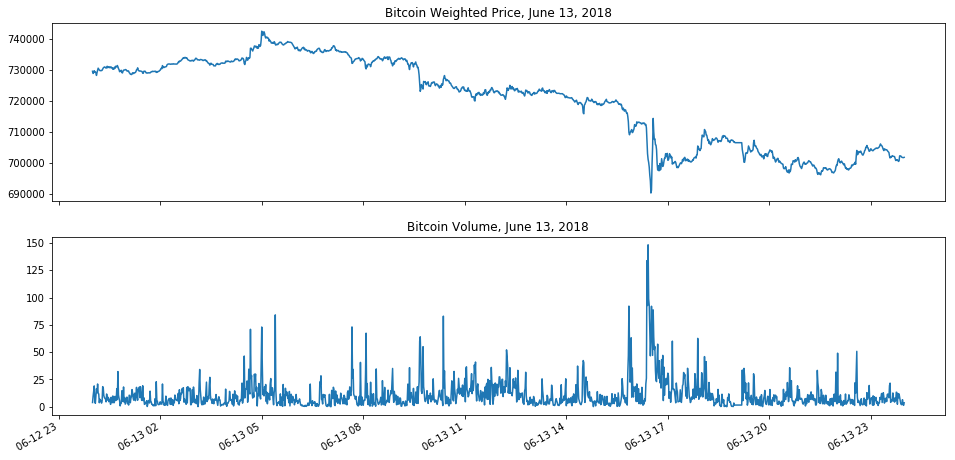

In [122]:
df1 = df.loc[(df.Timestamp > '2018-06-12 23:59') & (df.Timestamp < '2018-06-14 00:00')]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
axes = axes.flatten()

axes[0].plot(df1['Timestamp'], df1['Weighted_Price'])
axes[0].set_title('Bitcoin Weighted Price, June 13, 2018')

axes[1].plot(df1['Timestamp'], df1['Volume_(BTC)'])
axes[1].set_title('Closing Bitcoin Prices')
axes[1].set_title('Bitcoin Volume, June 13, 2018')

fig.autofmt_xdate()

In [ ]:
# Repeat exercise for other data

### Other types of plots common in Machine Learning

* Histogram
* Scatterplot
* Pair plot / Scatter matrix

### Histogram

Shows distribution of values in each column.

```
df.hist()
plt.show() # hides the console output
```

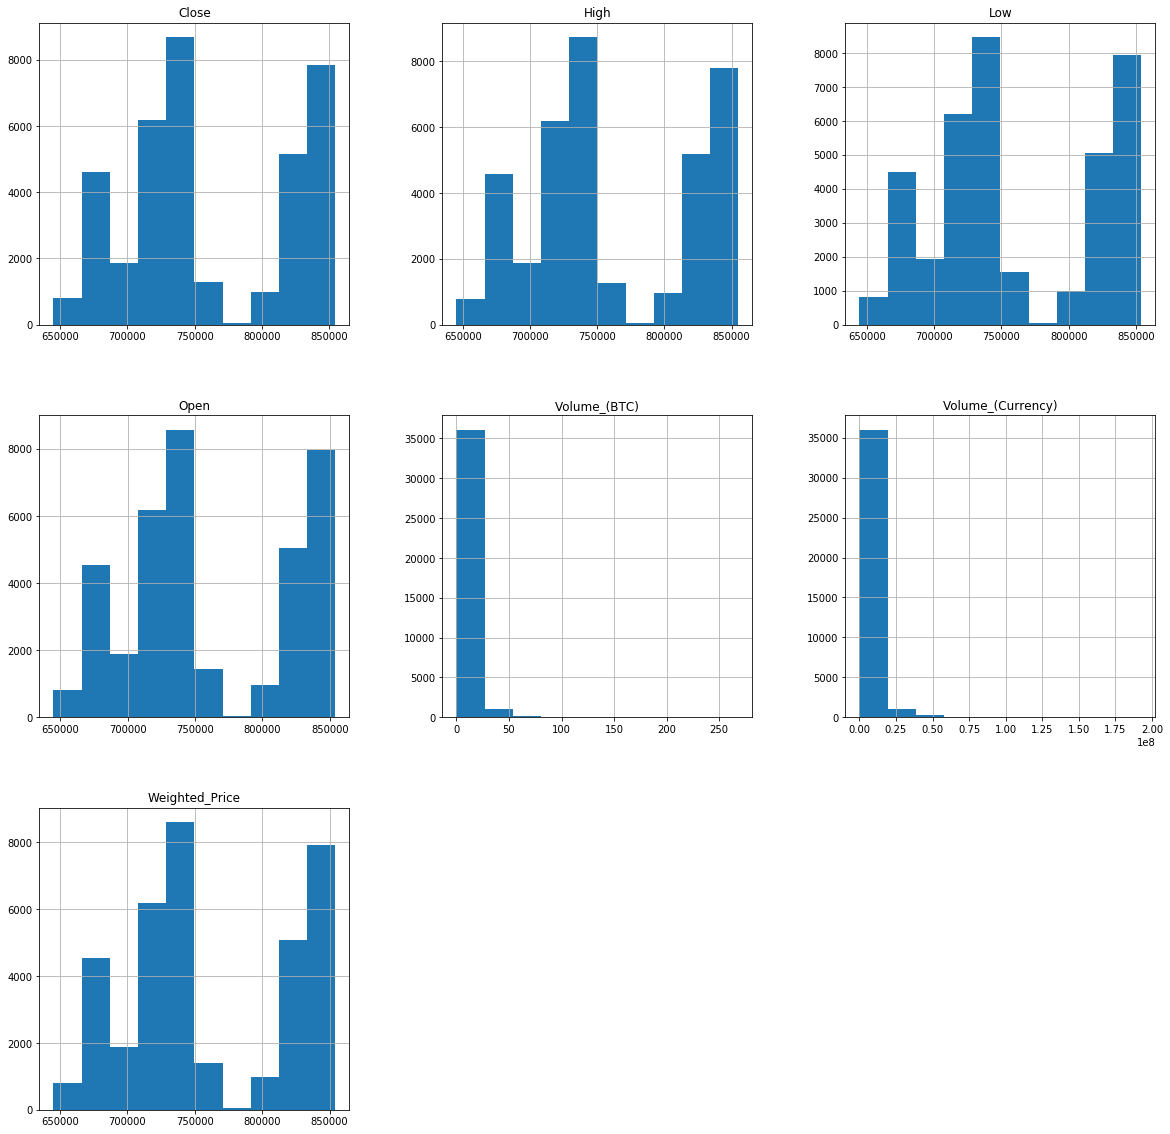

In [125]:
df.hist(figsize=(20, 20))
plt.show()

### Scatter plot

Can be used to show relationship between two columns.

```
ax.scatter(X, y)
```

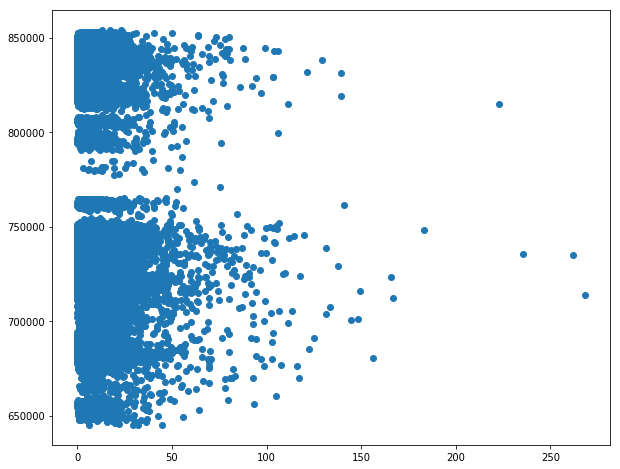

In [128]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df['Volume_(BTC)'], df['Weighted_Price'])
plt.show()

### Pair plot / Scatter matrix

A matrix of scatter plot and histogram, between every pair of columns

```
sns.pairplot()
```

In [129]:
# Omit the timestamp column as it is always unique

df1 = df.loc[:, df.columns != 'Timestamp']
df1.columns # checking that we got the right loc syntax

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

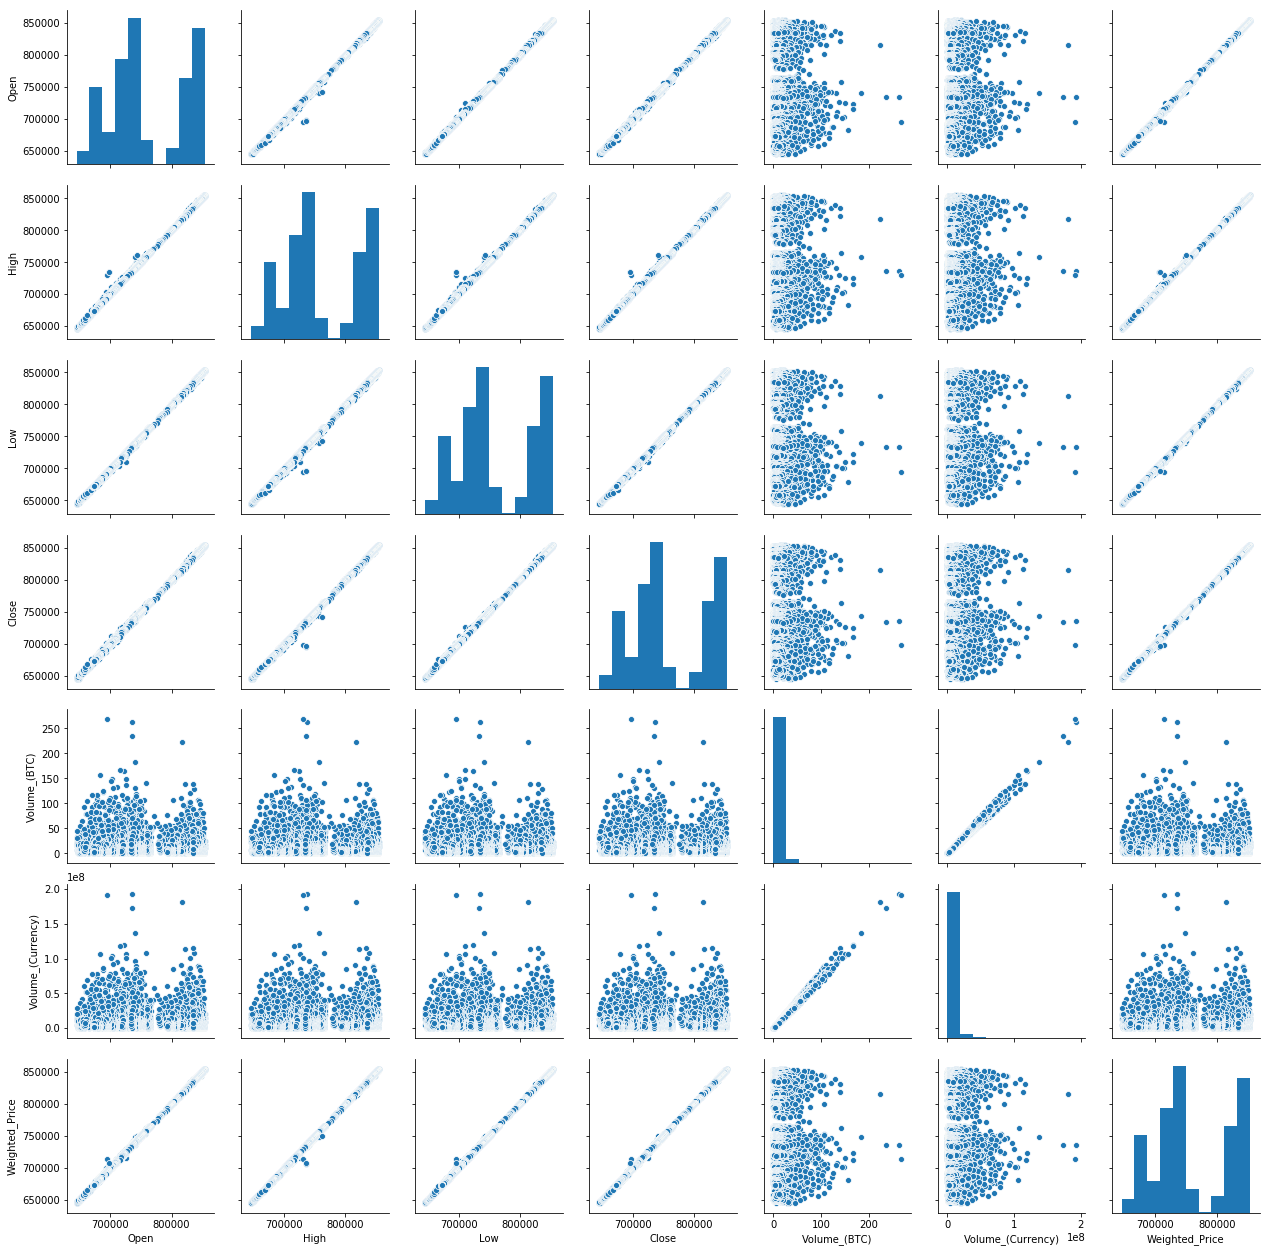

In [138]:
sns.pairplot(df1)